In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import loader
import tensorflow as tf
import alexnetmodel as an

batch_size = 128
num_preprocess_threads = 4

g = tf.Graph()
sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True))
with g.as_default():
    sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True))
    with sess.as_default():    
        # setup the data loader
        with tf.device('cpu:0'):
            
            train_images, train_labels, train_synsets = loader.batch_inputs(loader.train_dataset, batch_size, True, num_preprocess_threads, 4)
            eval_images, eval_labels, eval_synsets = loader.batch_inputs(loader.eval_dataset, batch_size, False, num_preprocess_threads, 1)
            




        # setup model to train
        with tf.device('gpu:0'):
            model = an.AlexNet()
            cross_entropy, train_step = model.build(train_images, train_labels, eval=False)
            accuracy = model.build(eval_images, eval_labels)
            

In [17]:
with g.as_default():
    with sess.as_default():
        tf.initialize_all_variables().run()
        tf.train.start_queue_runners(sess)

        
        for i in range(100000):
            if i%100 == 0:
                feed_dict = {model.keep_prob1: 1, model.keep_prob2: 1}
                train_accuracy = accuracy.eval(feed_dict=feed_dict)
                print('Accuracy is %.5f' % train_accuracy)
            feed_dict = {model.keep_prob1: 0.5, model.keep_prob2: 0.5}
            _, ce = sess.run([train_step, cross_entropy], feed_dict=feed_dict)
            print('\rIter %d CE=%.5f' % (i, ce))


Accuracy is 0.00000
Iter 0 CE=36.84136
Iter 1 CE=36.84136
Iter 2 CE=36.84136
Iter 3 CE=36.84136
Iter 4 CE=36.84136
Iter 5 CE=36.84136
Iter 6 CE=36.84136
Iter 7 CE=36.84136
Iter 8 CE=36.84136


KeyboardInterrupt: 

In [11]:
with g.as_default():
    with sess.as_default():
        tf.initialize_all_variables().run()
        tf.train.start_queue_runners(sess)
        img = sess.run(train_images)
        thug = sess.run(train_labels)
        syn = sess.run(train_synsets)

In [13]:
syn[1]



array([b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b''], dtype=object)

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
img.shape
thug.shape


(128,)

711

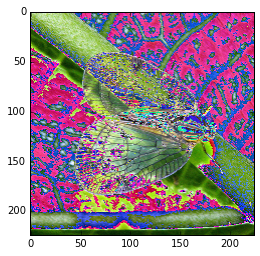

In [42]:
plt.imshow(img[1,...])
thug[1]

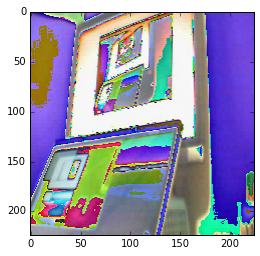

In [31]:
plt.imshow(img[4,...])